In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

players = pd.read_csv('core/Master.csv')
salary = (pd.read_csv('core/Salaries.csv'))
teams = (pd.read_csv('core/Teams.csv'))

## Questions to Answer

1. How has the salary for baseball been over the history of the MLB? Total? Average?
2. Whats the correlation between performance and salary?
3. What positions garner the highest salaries?
4. How is the wage disparity for baseball players? Top heavy? Even?
5. Do teams with high salaries win championships?

## What Needs to be Done

1. Need to convert the salaries dataframe to a timeindex dataframe. This will let us do a plot of salary changes over time.
2. Adjust salaries to inflation.
3. 

C:\Users\Adam Collado\.virtualenvs\DAND\lib\site-packages\pandas\core\groupby.py:2873: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)


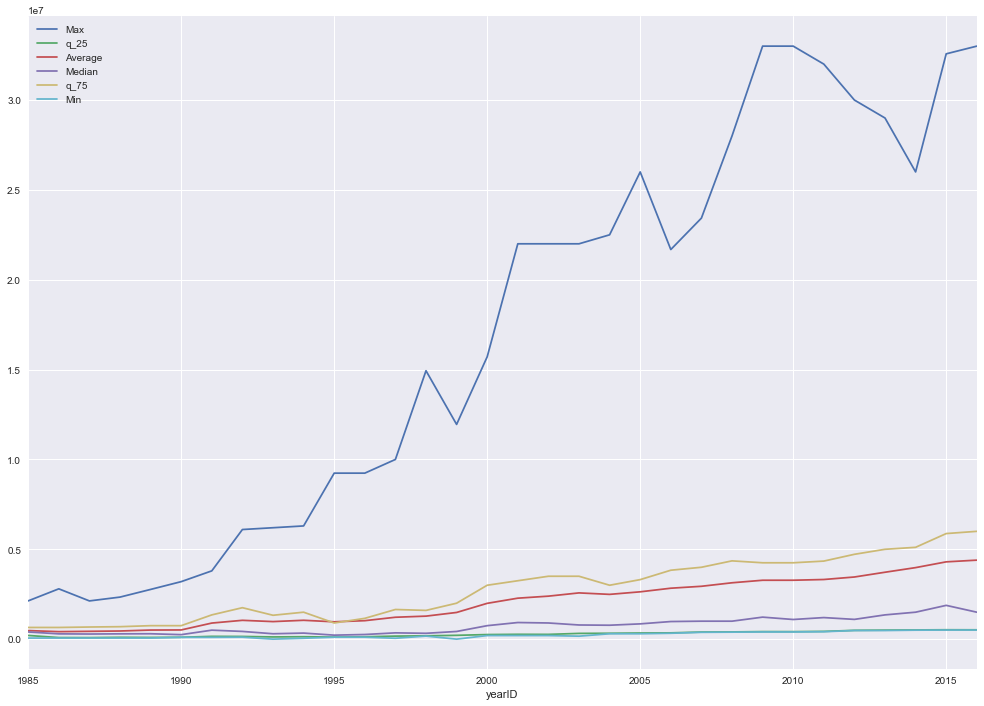

In [2]:
salary_by_year = salary.groupby(['yearID'])
salary_plot = salary_by_year['salary'].agg([{'Average': np.mean, 'Total': np.sum, 'Min': np.min, 'Max': np.max, "Median": np.median}])
salary_plot.columns = salary_plot.columns.droplevel(0)
salary_plot = (salary_plot.assign(q_25=salary_by_year.quantile(.25))
                          .assign(q_75=salary_by_year.quantile(.75)))
salary_plot[['Max', 'q_25', 'Average', 'Median', 'q_75', 'Min']].plot(figsize=(17, 12))

In [ ]:
salary_by_player_year = salary.groupby(['yearID'])
top_ten_by_year = salary_by_player_year.apply(lambda x: x.nlargest(10, 'salary'))

sorted_salary = salary.sort_values('salary', ascending=False)
sorted_salary.groupby('yearID').apply(lambda x: x['salary'].iloc[0] - x['salary'].median())
top_ten_by_year.loc[2013]

Why do some baseball players have a salary of 0??

In [ ]:
salary[salary['yearID'] == 2016]['salary'].hist()

In [ ]:
plot_salary_sum = salary_by_year.sum().plot(figsize=(12,6))
plot_salary_sum.set(xlabel='Year', ylabel="Sum of Salaries")
plt.tight_layout()

### Salary By Teams

In [ ]:
salary.pivot_table('salary', index='yearID', columns='teamID')

In [ ]:
salary_by_year = salary.groupby(['yearID'])['salary'].agg([np.max, np.mean, np.median, np.min])
salary_by_year

,yearID,teamID,W,salary,rank
0,1985,ATL,66,14807000,26.00
1,1985,BAL,83,11560712,21.00
2,1985,BOS,81,10897560,17.00
3,1985,CAL,90,14427894,25.00
4,1985,CHA,85,9846178,12.00


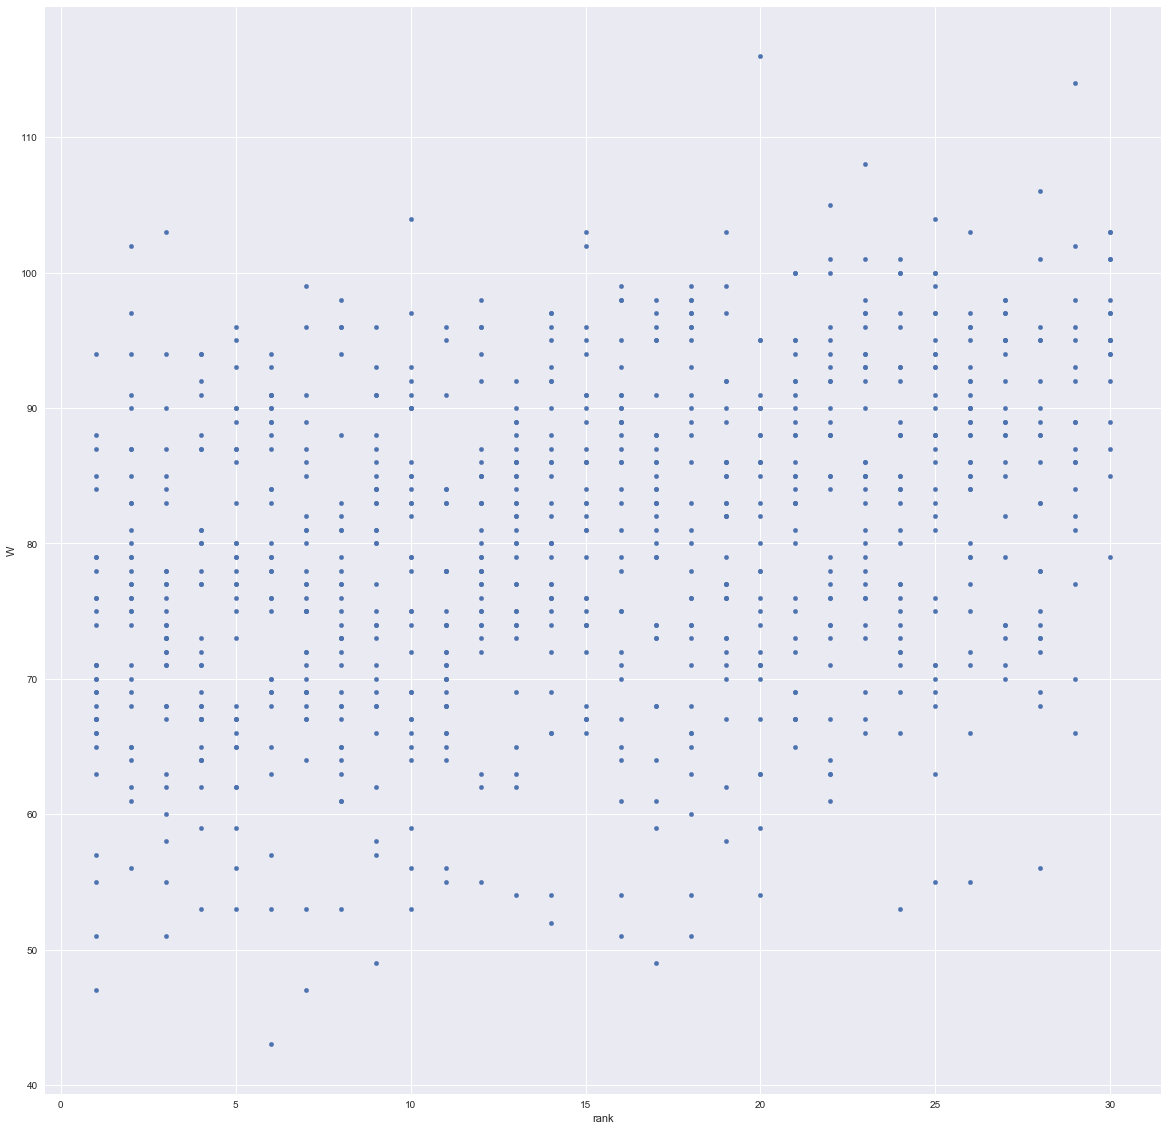

In [25]:
# teams.merge(salary, on=['teamID', 'yearID'])
team_salary = teams.merge(salary.groupby(['teamID', 'yearID']).sum().reset_index(), on=['teamID', 'yearID'])
team_salary_by_year = team_salary.groupby(['yearID', 'teamID', 'W'])['salary'].sum().reset_index()
team_salary_by_year
#team_salary_by_year['rank'] = team_salary_by_year.groupby('yearID').rank()
team_salary_by_year['rank'] = team_salary_by_year.groupby('yearID')['salary'].rank()
#team_salary_by_year.pivot_table('rank', index='yearID', columns='teamID').plot(figsize=(20, 20))
team_salary_by_year.plot(kind='scatter', x='rank', y='W', figsize=(20, 20))
team_salary_by_year.head(5)

In [72]:
cpi_u_values = pd.read_csv('cpi_u_values.csv')
cpiu_with_salary = team_salary.merge(cpi_u_values, left_on='yearID', right_on='Year')
cpiu_with_salary = cpiu_with_salary[['yearID', 'teamID', 'W', 'salary', 'Annual']]
cpiu_with_salary['salary_adj'] = cpiu_with_salary.apply(lambda x: (x['salary'] * 240.01)/x['Annual'], axis=1)

salary_with_cpi = salary.merge(cpi_u_values, left_on='yearID', right_on='Year')
salary_with_cpi['salary_adj'] = salary_with_cpi.apply(lambda x: (x['salary'] * 240.01)/x['Annual'], axis=1)
salary_with_cpi['salary'] * 240.01 / salary_with_cpi['Annual']
cpi_u_values.dtypes

Year        int64
Annual    float64
dtype: object

In [77]:
pd.read_csv('cpi_u_values.csv', float_precision='None').iloc[0]['Annual']

107.59999999999999

In [ ]:
team_salary[['W', 'salary']].rank

In [6]:
team_salary.rank?

In [ ]:
team_salary[['W', 'salary']].rank